# Mushroom Classification

## Starting pyspark

In [86]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.context import SparkContext

# Create pyspark object
spark=SparkSession.builder.appName('Mushroom').getOrCreate()

## Get dataset

In [87]:
df = spark.read.csv('data/mushrooms.csv',header=True,inferSchema=True)

## Data exploration

In [88]:
# Show the type of the data
df.printSchema()

root
 |-- class: string (nullable = true)
 |-- cap-shape: string (nullable = true)
 |-- cap-surface: string (nullable = true)
 |-- cap-color: string (nullable = true)
 |-- bruises: string (nullable = true)
 |-- odor: string (nullable = true)
 |-- gill-attachment: string (nullable = true)
 |-- gill-spacing: string (nullable = true)
 |-- gill-size: string (nullable = true)
 |-- gill-color: string (nullable = true)
 |-- stalk-shape: string (nullable = true)
 |-- stalk-root: string (nullable = true)
 |-- stalk-surface-above-ring: string (nullable = true)
 |-- stalk-surface-below-ring: string (nullable = true)
 |-- stalk-color-above-ring: string (nullable = true)
 |-- stalk-color-below-ring: string (nullable = true)
 |-- veil-type: string (nullable = true)
 |-- veil-color: string (nullable = true)
 |-- ring-number: string (nullable = true)
 |-- ring-type: string (nullable = true)
 |-- spore-print-color: string (nullable = true)
 |-- population: string (nullable = true)
 |-- habitat: string 

In [89]:
# Show the columns of the dataset
df.columns

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [90]:
# Show the description of the dataset
df.describe().show(vertical=True)

-RECORD 0--------------------------
 summary                  | count  
 class                    | 8124   
 cap-shape                | 8124   
 cap-surface              | 8124   
 cap-color                | 8124   
 bruises                  | 8124   
 odor                     | 8124   
 gill-attachment          | 8124   
 gill-spacing             | 8124   
 gill-size                | 8124   
 gill-color               | 8124   
 stalk-shape              | 8124   
 stalk-root               | 8124   
 stalk-surface-above-ring | 8124   
 stalk-surface-below-ring | 8124   
 stalk-color-above-ring   | 8124   
 stalk-color-below-ring   | 8124   
 veil-type                | 8124   
 veil-color               | 8124   
 ring-number              | 8124   
 ring-type                | 8124   
 spore-print-color        | 8124   
 population               | 8124   
 habitat                  | 8124   
-RECORD 1--------------------------
 summary                  | mean   
 class                    | 

In [91]:
# Show null values
from pyspark.sql.functions import when, count, col, isnull

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show(vertical=True)

-RECORD 0-----------------------
 class                    | 0   
 cap-shape                | 0   
 cap-surface              | 0   
 cap-color                | 0   
 bruises                  | 0   
 odor                     | 0   
 gill-attachment          | 0   
 gill-spacing             | 0   
 gill-size                | 0   
 gill-color               | 0   
 stalk-shape              | 0   
 stalk-root               | 0   
 stalk-surface-above-ring | 0   
 stalk-surface-below-ring | 0   
 stalk-color-above-ring   | 0   
 stalk-color-below-ring   | 0   
 veil-type                | 0   
 veil-color               | 0   
 ring-number              | 0   
 ring-type                | 0   
 spore-print-color        | 0   
 population               | 0   
 habitat                  | 0   



In [92]:
# Display the first row using .collect
df.collect()[0]

Row(class='p', cap-shape='x', cap-surface='s', cap-color='n', bruises='t', odor='p', gill-attachment='f', gill-spacing='c', gill-size='n', gill-color='k', stalk-shape='e', stalk-root='e', stalk-surface-above-ring='s', stalk-surface-below-ring='s', stalk-color-above-ring='w', stalk-color-below-ring='w', veil-type='p', veil-color='w', ring-number='o', ring-type='p', spore-print-color='k', population='s', habitat='u')

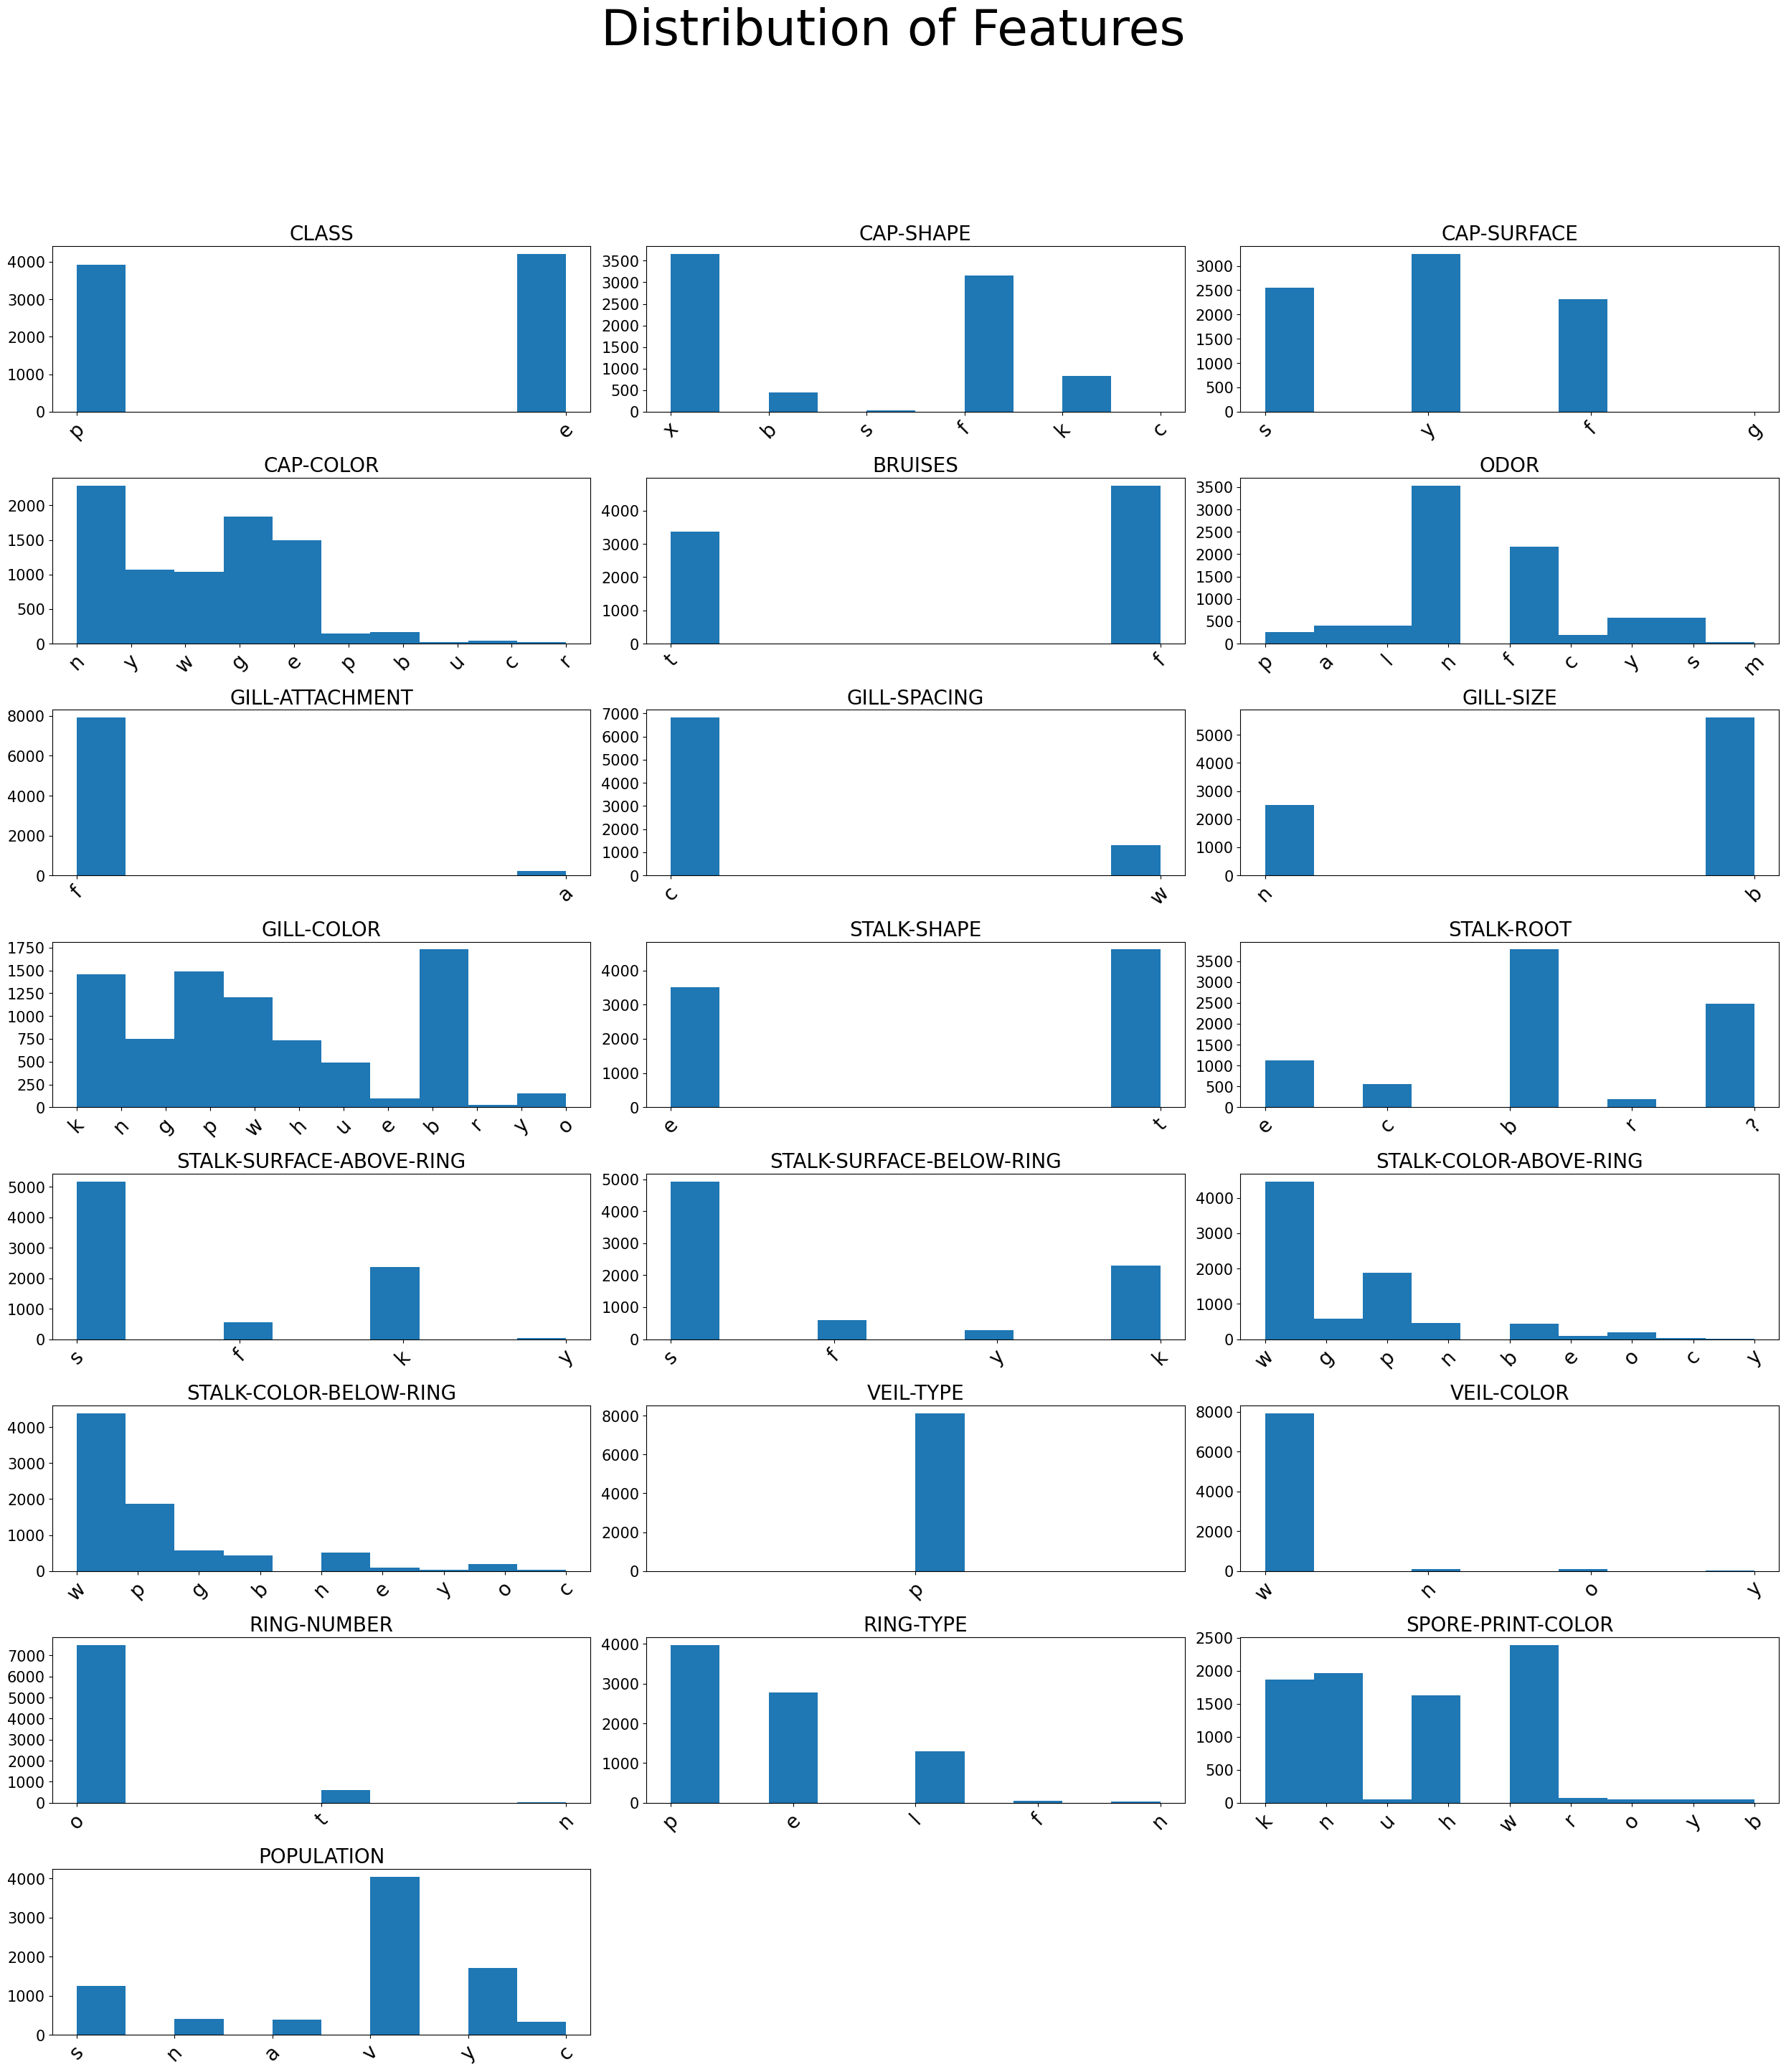

In [93]:
# Show the histagram for all the columns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 30))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")

for col, num in zip(df.toPandas().describe().columns, range(1,23)):
  ax = fig.add_subplot(8, 3, num)
  ax.hist(df.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()
     

# Feature selection : same type goes together

In [94]:
from pyspark.sql.functions import concat

# Create new column Cap by combining shape surface and color

df = df.withColumn("cap", concat(df['cap-shape'],df['cap-surface'],df['cap-color']).alias("cap"))
df = df.drop('cap-shape','cap-color','cap-surface')
df.columns


['class',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat',
 'cap']

In [95]:
df = df.withColumn("gill", concat(df['gill-attachment'],df['gill-spacing'],df['gill-size'],df['gill-color']).alias("cap"))
df = df.drop('gill-attachment','gill-spacing','gill-size','gill-color')

In [96]:
df = df.withColumn("stalk", concat(df['stalk-shape'],df['stalk-root'],df['stalk-surface-above-ring'],
        df['stalk-surface-below-ring'],df['stalk-color-above-ring'],df['stalk-color-below-ring']).alias("stalk"))
df = df.drop('stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
        'stalk-color-above-ring','stalk-color-below-ring')

In [97]:
df = df.withColumn("veil", concat(df['veil-type'],df['veil-color'].alias("veil")))
df = df.drop('veil-type','veil-color')

In [98]:
df = df.withColumn("ring", concat(df['ring-number'],df['ring-type'].alias("ring")))
df = df.drop('ring-number','ring-type')

In [99]:
len(df.columns)

11

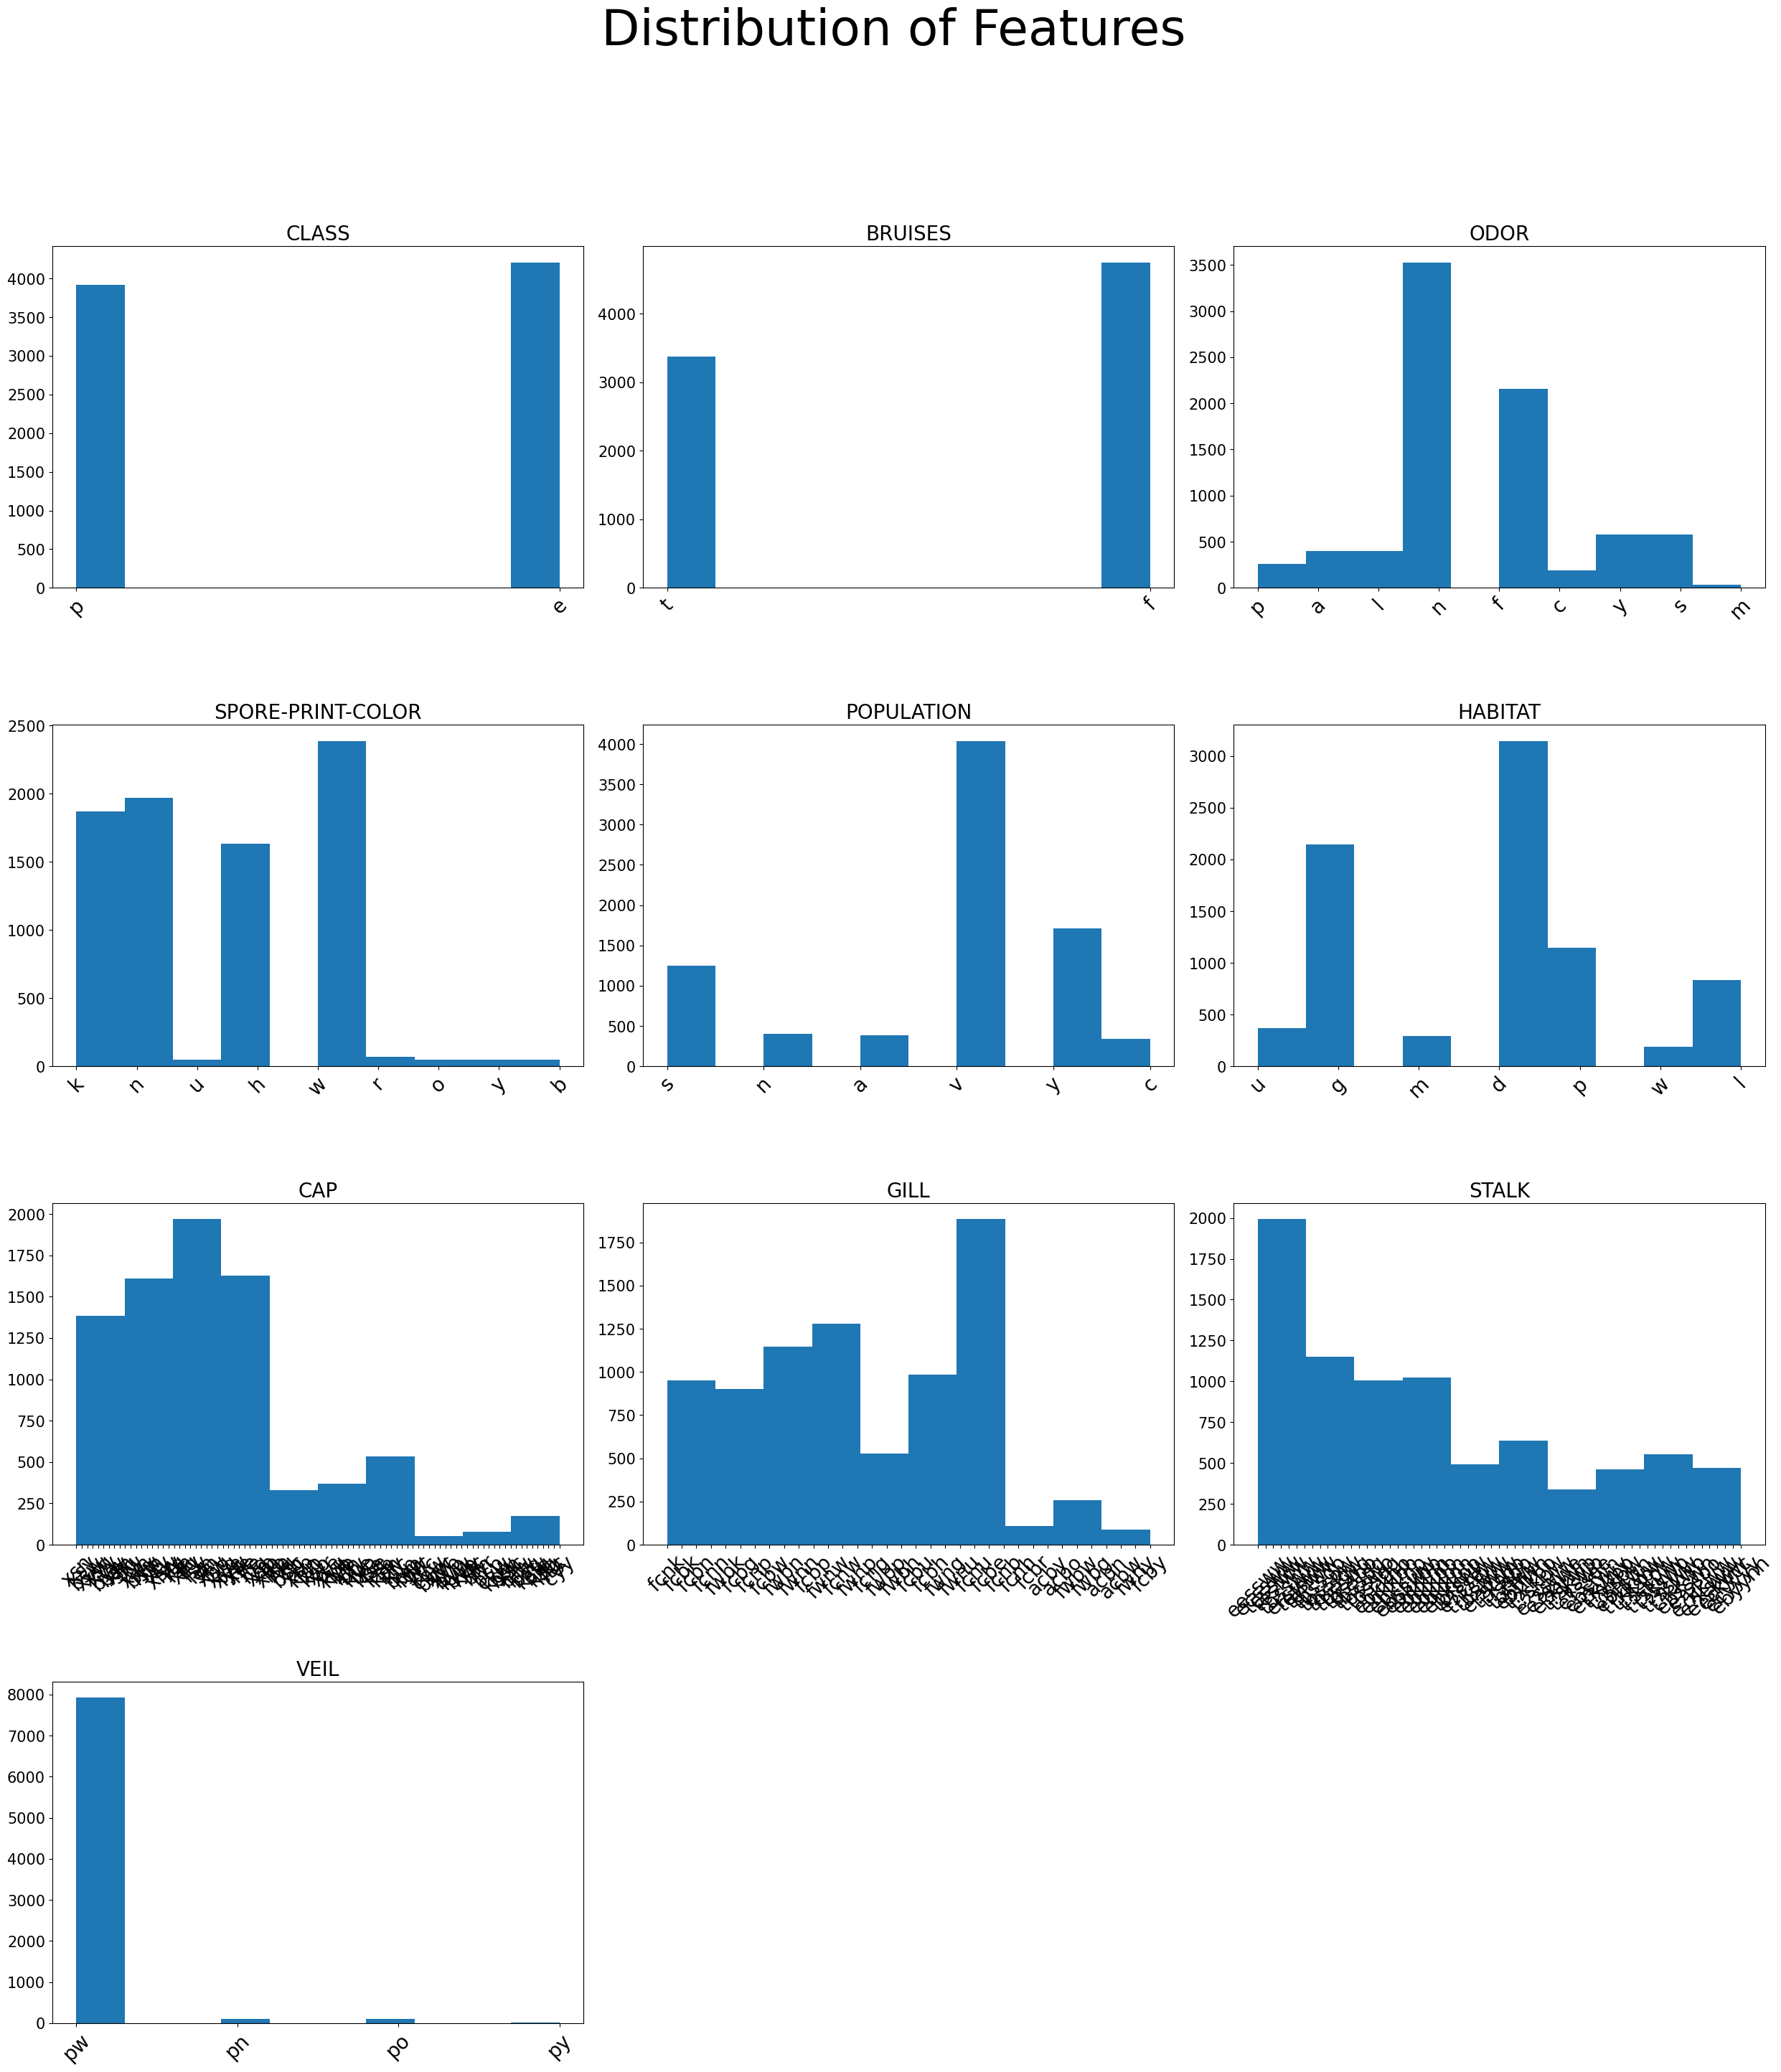

In [100]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 30))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")

for col, num in zip(df.toPandas().describe().columns, range(1,11)):
  ax = fig.add_subplot(4, 3, num)
  ax.hist(df.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

# Preprocessing - Handling categorical features using pipeline

In [101]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline

categoricalColumns = [
 'bruises',
 'odor',
 'spore-print-color',
 'population',
 'habitat',
 'cap',
 'gill',
 'stalk',
 'veil',
 'ring']

stages = []

for categoricalcol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol=categoricalcol, outputCol=categoricalcol+'_index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalcol+"_class_vec"])
    stages += [stringIndexer, encoder]

label_string_indexer = StringIndexer(inputCol='class', outputCol='label')
stages += [label_string_indexer]

assemblerInputs = [c + '_class_vec' for c in categoricalColumns]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol='vec_features')
stages += [assembler]
scaler = StandardScaler(inputCol='vec_features',outputCol='features')
stages += [scaler]



In [102]:
assembler

VectorAssembler_6a3a86f38376

In [103]:
cols = df.columns
pipeline = Pipeline(stages=stages)
df_pipe = pipeline.fit(df).transform(df)
selectedCols = ['label','features'] + cols 
df2 = df_pipe.select(selectedCols)
df2.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- class: string (nullable = true)
 |-- bruises: string (nullable = true)
 |-- odor: string (nullable = true)
 |-- spore-print-color: string (nullable = true)
 |-- population: string (nullable = true)
 |-- habitat: string (nullable = true)
 |-- cap: string (nullable = true)
 |-- gill: string (nullable = true)
 |-- stalk: string (nullable = true)
 |-- veil: string (nullable = true)
 |-- ring: string (nullable = true)



# Train test split

In [104]:

print(f"There are {df2.count()} records in total. Split the data into training and test sets (20% held out for testing)")

There are 8124 records in total. Split the data into training and test sets (20% held out for testing)


In [105]:
train, test = df2.randomSplit([0.8, 0.2], seed=42)
print(f"Training Data Size: {train.count()}")
print(f"Test Data Size: {test.count()}")

Training Data Size: 6573
Test Data Size: 1551


In [106]:
train.groupby('class').count().show()

+-----+-----+
|class|count|
+-----+-----+
|    e| 3420|
|    p| 3153|
+-----+-----+



# Model Training - Logistique Regression

In [107]:
from pyspark.ml.classification import LogisticRegression

In [135]:
lr = LogisticRegression(featuresCol='features',labelCol='label', maxIter=5)
model = lr.fit(train)
pred = model.transform(test)
pred.select('label','features', 'rawPrediction','prediction','probability').toPandas().head()

,label,features,rawPrediction,prediction,probability
0,0.0,"(2.029021317413419, 2.0173854569978187, 0.0, 0...","[2.77107561972838, -2.77107561972838]",0.0,"[0.9410926442651126, 0.05890735573488737]"
1,0.0,"(2.029021317413419, 2.0173854569978187, 0.0, 0...","[2.753299739684783, -2.753299739684783]",0.0,"[0.9400994364396051, 0.05990056356039486]"
2,0.0,"(2.029021317413419, 2.0173854569978187, 0.0, 0...","[3.93838417809657, -3.93838417809657]",0.0,"[0.9808925418841623, 0.019107458115837694]"
3,0.0,"(2.029021317413419, 2.0173854569978187, 0.0, 0...","[4.029571762160554, -4.029571762160554]",0.0,"[0.9825287299084793, 0.01747127009152072]"
4,0.0,"(2.029021317413419, 2.0173854569978187, 0.0, 0...","[2.2675144015077575, -2.2675144015077575]",0.0,"[0.9061506215958725, 0.09384937840412755]"


In [144]:
test.columns

['label',
 'features',
 'class',
 'bruises',
 'odor',
 'spore-print-color',
 'population',
 'habitat',
 'cap',
 'gill',
 'stalk',
 'veil',
 'ring']

# Model Evaluation - Logistique Regression

In [109]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [110]:
eval = BinaryClassificationEvaluator()

In [111]:

print(f"Test Area Under ROC: {eval.evaluate(pred)}")

Test Area Under ROC: 1.0


# Model Accuracy - Logistique Regression

In [112]:
acc = pred.filter(pred.label == pred.prediction).count() / float(pred.count())

In [113]:
print(f"Accuracy: {acc}")

Accuracy: 1.0


In [114]:
print(lr.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The

# Model training RandomForestClassifier

In [115]:
from pyspark.ml.classification import RandomForestClassifier
# Train a RandomForest model.
rf = RandomForestClassifier(labelCol='label', \
                            featuresCol="features", \
                            numTrees=50)
# from pyspark.ml import Pipeline
# pipeline_rf = Pipeline(stages=[vecAssembler, stdScaler, rf])
# pipelineModel_rf = pipeline_rf.fit(trainDF)

In [139]:
model_rf = rf.fit(train)
pred_rf = model_rf.transform(test)
pred_rf.select('label','features', 'rawPrediction','prediction','probability').toPandas().head()

,label,features,rawPrediction,prediction,probability
0,0.0,"(2.029021317413419, 2.0173854569978187, 0.0, 0...","[30.126889361785093, 19.873110638214907]",0.0,"[0.6025377872357018, 0.39746221276429816]"
1,0.0,"(2.029021317413419, 2.0173854569978187, 0.0, 0...","[30.126889361785093, 19.873110638214907]",0.0,"[0.6025377872357018, 0.39746221276429816]"
2,0.0,"(2.029021317413419, 2.0173854569978187, 0.0, 0...","[32.027981212202924, 17.972018787797087]",0.0,"[0.6405596242440583, 0.3594403757559416]"
3,0.0,"(2.029021317413419, 2.0173854569978187, 0.0, 0...","[31.99477458191088, 18.005225418089122]",0.0,"[0.6398954916382177, 0.3601045083617824]"
4,0.0,"(2.029021317413419, 2.0173854569978187, 0.0, 0...","[30.126889361785093, 19.873110638214907]",0.0,"[0.6025377872357018, 0.39746221276429816]"


In [133]:
eval_rf = BinaryClassificationEvaluator()
print(f"Test Area Under ROC: {eval.evaluate(pred_rf)}")

Test Area Under ROC: 1.0


In [130]:
acc_rf = pred_rf.filter(pred_rf.label == pred_rf.prediction).count() / float(pred_rf.count())
print(f"Accuracy: {acc_rf}")
print(model_rf.explainParams())

Accuracy: 1.0
bootstrap: Whether bootstrap samples are used when building trees. (default: True)
cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3

# Load the model

In [137]:
from pyspark.ml.classification import RandomForestClassificationModel

In [138]:
model2 = RandomForestClassificationModel.load("test_rf")

Py4JJavaError: An error occurred while calling o6861.load.
: java.lang.UnsatisfiedLinkError: org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Ljava/lang/String;I)Z
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Native Method)
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access(NativeIO.java:793)
	at org.apache.hadoop.fs.FileUtil.canRead(FileUtil.java:1218)
	at org.apache.hadoop.fs.FileUtil.list(FileUtil.java:1423)
	at org.apache.hadoop.fs.RawLocalFileSystem.listStatus(RawLocalFileSystem.java:601)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1972)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:2014)
	at org.apache.hadoop.fs.FileSystem$4.<init>(FileSystem.java:2180)
	at org.apache.hadoop.fs.FileSystem.listLocatedStatus(FileSystem.java:2179)
	at org.apache.hadoop.fs.ChecksumFileSystem.listLocatedStatus(ChecksumFileSystem.java:783)
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:285)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:208)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:292)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:292)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:288)
	at org.apache.spark.rdd.RDD.$anonfun$take$1(RDD.scala:1449)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.take(RDD.scala:1443)
	at org.apache.spark.rdd.RDD.$anonfun$first$1(RDD.scala:1484)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.first(RDD.scala:1484)
	at org.apache.spark.ml.util.DefaultParamsReader$.loadMetadata(ReadWrite.scala:587)
	at org.apache.spark.ml.tree.EnsembleModelReadWrite$.loadImpl(treeModels.scala:511)
	at org.apache.spark.ml.classification.RandomForestClassificationModel$RandomForestClassificationModelReader.load(RandomForestClassifier.scala:420)
	at org.apache.spark.ml.classification.RandomForestClassificationModel$RandomForestClassificationModelReader.load(RandomForestClassifier.scala:410)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)


In [141]:
test.select()

DataFrame[]

In [142]:
print(test.collect()[0])

Row(label=0.0, features=SparseVector(221, {0: 2.029, 1: 2.0174, 9: 2.1949, 17: 1.9999, 25: 3.2981, 29: 4.6774, 135: 9.4501, 210: 26.0369, 212: 6.4529, 216: 2.147}), class='e', bruises='f', odor='n', spore-print-color='w', population='v', habitat='l', cap='fyn', gill='fwnw', stalk='ebsfwn', veil='pw', ring='oe')


# Get test data

In [ ]:
class Mushroom:
    def __init__(self, 
                bruises, 
                odor,
                spore_print_color,
                population,
                habitat,
                cap,
                gill,
                stalk,
                veil,
                ring):
        self.bruises = bruises
        self.odor = odor
        self.spore_print_color = spore_print_color
        self.population = population
        self.habitat = habitat
        self.cap = cap
        self.gill = gill
        self.stalk = stalk
        self.veil = veil
        self.ring = ring

    def get_columns(self):
        for attribute, value in self.__dict__.items():
            print(attribute, '=', value)